In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
from  numpy import genfromtxt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,confusion_matrix)
from sklearn.metrics import roc_curve

In [ ]:
df = pd.read_csv("/content/KDDTrain+.txt", delimiter=',')
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:

# df['ftp_data'].unique()
# #70 differente columns so we don't need that column 
# df.drop('ftp_data',axis=1,inplace=True)

In [ ]:
df.shape

(148516, 43)

In [ ]:
df.describe()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20
count,148516.000000,1.485160e+05,1.485160e+05,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,...,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000
mean,276.781168,4.022822e+04,1.708897e+04,0.000215,0.020523,0.000202,0.189380,0.004323,0.402792,0.255063,...,119.463297,0.534523,0.084103,0.145932,0.030584,0.256124,0.251306,0.136221,0.136398,19.278475
std,2460.691310,5.409630e+06,3.703537e+06,0.014677,0.240070,0.019417,2.013167,0.072248,0.490461,22.231450,...,111.232422,0.448062,0.194103,0.308639,0.108975,0.428501,0.429720,0.322742,0.335283,2.739766
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df.describe(include="O")

,tcp,ftp_data,SF,normal
count,148516,148516,148516,148516
unique,3,70,11,40
top,tcp,http,SF,normal
freq,121568,48191,89819,77053


In [ ]:
#categorique sdata and nemerique data
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else :
    num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data)
num_data=pd.DataFrame(num_data)

In [ ]:
cat_data.isnull().sum().any()

False

In [ ]:
cat_data=cat_data.T


In [ ]:
target=cat_data['normal']
cat_data.drop('normal',axis=1,inplace=True)


In [ ]:
for i in range(len(target)):
  if target[i]!='normal':
    target[i]=0
  else :
    target[i]=1


In [ ]:
target

0         1
1         0
2         1
3         1
4         0
         ..
148511    1
148512    1
148513    0
148514    1
148515    0
Name: normal, Length: 148516, dtype: object

In [ ]:
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,tcp,ftp_data,SF
0,2,44,9
1,1,49,5
2,1,24,9
3,1,24,9
4,1,49,1
...,...,...,...
148511,1,54,9
148512,1,24,9
148513,1,24,9
148514,2,12,9


In [ ]:
num_data=num_data.T

In [ ]:
x=pd.concat([cat_data,num_data],axis=1)
y=target

In [ ]:
y.value_counts()

1    77053
0    71463
Name: normal, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


le pourcentage des normal trafic est:0.4811804788709634
le pourcentage des Anormal trafic est:0.5188195211290366


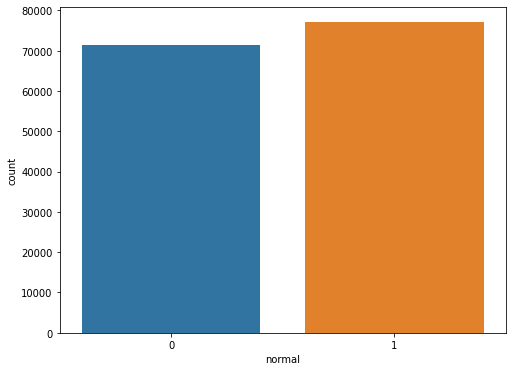

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y)
yes=target.value_counts()[0]/len(y)
no=target.value_counts()[1]/len(y)
print(f'le pourcentage des normal trafic est:{yes}')
print(f'le pourcentage des Anormal trafic est:{no}')

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[ 2.23594757,  0.75333143,  0.73373808, ..., -0.42207493,
        -0.40681627, -1.56162583],
       [-0.13201778,  1.06024059, -0.70773134, ..., -0.42207493,
        -0.40681627, -0.10164225],
       [-0.13201778, -0.47430522,  0.73373808, ..., -0.42207493,
        -0.37699065,  0.62834954],
       ...,
       [-0.13201778, -0.47430522,  0.73373808, ..., -0.20518274,
        -0.19803689, -1.56162583],
       [ 2.23594757, -1.21088721,  0.73373808, ..., -0.42207493,
        -0.40681627,  0.62834954],
       [-0.13201778,  1.55129525, -2.14920076, ...,  0.94124743,
         2.57574635, -1.92662173]])

In [ ]:
X_scaled.shape

(148516, 42)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y,test_size=0.2,random_state=42)

(29704, 42)

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)



In [ ]:
X_test.shape


(29704, 42)

In [ ]:
y_test.shape

(29704,)

In [ ]:
X_train.shape

(118812, 42)

In [ ]:
#construction de reseau de neuron
model=tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(units=20,activation='relu',kernel_initializer='uniform',input_dim=42))

In [ ]:
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                860       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,batch_size=1000,epochs=1000)

Epoch 1/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.0082 - binary_accuracy: 0.9973
Epoch 2/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.0081 - binary_accuracy: 0.9973
Epoch 3/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.0082 - binary_accuracy: 0.9973
Epoch 4/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.0081 - binary_accuracy: 0.9975
Epoch 5/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.0080 - binary_accuracy: 0.9974
Epoch 6/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.0080 - binary_accuracy: 0.9974
Epoch 7/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.0079 - binary_accuracy: 0.9974
Epoch 8/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.0079 - binary_accuracy: 0.9974
Epoch 9/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.0079 - binary_accuracy: 0.9974
Epoch 10/1000
119/1

In [ ]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)


929/929 [==============================] - 1s 1ms/step - loss: 0.0187 - binary_accuracy: 0.9977


In [ ]:
print(f'test accuracy est:{test_accuracy} et test loss {test_loss}')

test accuracy est:0.9977444410324097 et test loss 0.01868879236280918


In [ ]:
y_pred=model.predict(X_test)

929/929 [==============================] - 1s 1ms/step


In [ ]:
y_pred[40]

array([1.], dtype=float32)

In [ ]:
y_test[40]

1.0

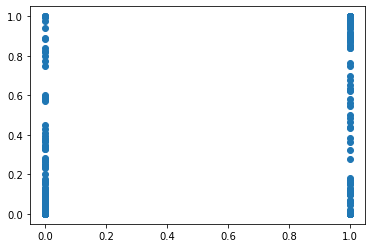

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()